JAVELIN Basics
===============

A Brief Introduction to JAVELIN
-------------------------------

Like pyCCF and pyZDCF, JAVELIN is another technique to find the correlation between two (or more) signals to obtain a time lag between them. pyCCF utilizes piecewise linear interpolation, while pyZDCF utilizes the discrete correlation function. 

JAVELIN utilizes interpolation similar to pyCCF, but does so with the Damped Random Walk (DRW) model. However, JAVELIN also assumes a tophat transfer function, that is convolved with the continuum and emission line light curves. For more information, see either the original SPEAR code, or the JAVELIN code directly.

In simpler terms, JAVELIN interpolates the light curves witha DRW model, assuming that the transfer function describing the time lag is a tophat function. Unlike the other methods, JAVELIN is able to fit multiple lines and the continuum.

Thus, JAVELIN will always fit for the DRW parameters ($\sigma_{\rm DRW}, \tau_{\rm DRW}$) and three tophat parameters ( lag/center, scale, and width ) for each line.

JAVELIN Module Arguments
------------------------

* ``rm_type``: The type of reverberation mapping (RM) analysis to perform. Can either be "spec" for spectroscopic RM, or "phot" for photometric RM. Default is "spec".

* ``lagtobaseline``: JAVELIN will normally use a log prior to penalize lag values larger than x*baseline, where x is ``lagtobasline``. Default is 0.3.

* ``laglimit``: An array specifying the lower and upper limits of the range of lags to search. If "baseline", the range will be set to [-baseline, baseline]. If only one value is given, it will be assumed for all lines, though different ranges may be specified for individual lines. Default is "baseline".

* ``fixed``: A list to determine what parameters to fix/vary when fitting the light curves. This should be an array with a length equal to the number of parameters in the model (i.e. 2 + 3*(number of light curves) ). The fitted parameters will be the two DRW parameters ( log($\sigma_{\rm DRW}$), log($\tau_{\rm DRW}$) ) and three tophat parameters for each non-continuum light curve (lag, width, scale). Setting to 0 will fix the parameter and setting to 1 will allow it to vary. If ``None``, all parameters will be allowed to vary. The fixed parameters must match the fixed value in the array input to the ``p_fix`` argument. Like ``laglimit``, if only one value is given, it will be used for all lines. Default is ``None``.

* ``p_fix``: A list of the fixed parameters, corresponding to the elements of the fixed array. If ``None``, all parameters will be allowed to vary. Default is ``None``.

* ``subtract_mean``: Whether to subtract the mean of the light curve before analysis. Default is ``True``.

* ``nwalkers``: The number of walkers to use in the MCMC. Default is 100.

* ``nburn``: The number of burn-in steps to use in the MCMC. Default is 100.

* ``nchain``: The number of steps to use in the MCMC. Default is 100.

* ``threads``: The number of threads to use in the MCMC. Default is 1.

* ``output_chains``: Whether to output the MCMC chains to a file. Default is ``True``.

* ``output_burn``: Whether to output the MCMC burn-in chains to a file. Default is ``True``.

* ``output_logp``: Whether to output the MCMC log-probability to a file. Default is ``True``.

* ``together``: Whether to fit all of the lines to the continuum together or separately. Default is ``False``.

* ``nbin``: The number of bins to use for the output histograms for each parameter. Default is 50.


.. note:: For ``laglimit``, ``fixed``, and ``p_fix``, if multiple lines are input only one value is given, the same value will be used for all lines. Different arrays may also be given for each line.

.. warning:: If ``use_for_javelin=True`` in the DRW Rejection module and ``p_fix``/``fixed`` are specified, the module will use the DRW parameters from the DRW Rejection module as the fixed parameters.

.. warning:: JAVELIN cannot utilize multiple bands for photometric RM, so ``together`` must be set to ``False`` if ``rm_type=phot``.

Using the JAVELIN Module
------------------------

Before running JAVELIN, we'll give a brief description of what it does. If the DRW parameters are not held fixed, PETL will first fit the continuum light curve to a DRW (using JAVELIN's software). JAVELIN uses its own MCMC and modeling algorithms, as opposed to the DRW Rejection module. 

If ``verbose=True``, the posteriors of these parameters $(\log(\sigma_{\rm DRW}), \log(\tau_{\rm DRW}))$ will be shown with histograms of the MCMC samples. Afterwards, JAVELIN will use the median values of these parameters and their uncertainties as priors for the actual JAVELIN fit.

Then, JAVELIN will fit the light curves (all if ``together=True``, and the continuum and each light curve separately if ``together=False``) to the DRW+tophat model. The MCMC samples will be shown in histograms again, and the median values of these distributions will be used as the fit parameters. Additionally, a corner plot will be shown, showing the correlations between the parameters. 

Afterwards, JAVELIN will be used to predict the light curves at a higher cadence, using the best-fit DRW and tophat parameters.

### A Simple Example

First, we'll run the JAVELIN module on three light curves (the continuum with two lines) with custom parameters:

In [1]:
import pypetal.pipeline as pl

main_dir = 'pypetal/examples/dat/javelin_'
filenames = [ main_dir + 'continuum.dat', main_dir + 'yelm.dat', main_dir + 'zing.dat' ]

line_names = ['continuum', 'line1', 'line2']


Running JAVELIN
--------------------
rm_type: spec
lagtobaseline: 0.1
laglimit: [[0, 200], [0, 500]]
fixed: True
p_fix: True
subtract_mean: True
nwalker: 50
nburn: 50
nchain: 100
output_chains: True
output_burn: True
output_logp: True
nbin: 100
metric: med
together: False
--------------------
        
start burn-in
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line1/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.67 0.71 0.73 0.56 0.64 0.74 0.74 0.76 0.77 0.69 0.74 0.64 0.70 0.71 0.67 0.68 0.75 0.69 0.76 0.70 0.78 0.67 0.66 0.69 0.64 0.76 0.78 0.74 0.69 0.60 0.70 0.78 0.78 0.69 0.69 0.79 0.61 0.69 0.73 0.74 0.75 0.72 0.81 0.67 0.72 0.68 0.71 0.73 0.66 0.70
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line1/javelin/chain_cont.txt
save logp of MCMC chains to /home/stone28/projects/petl_mock/

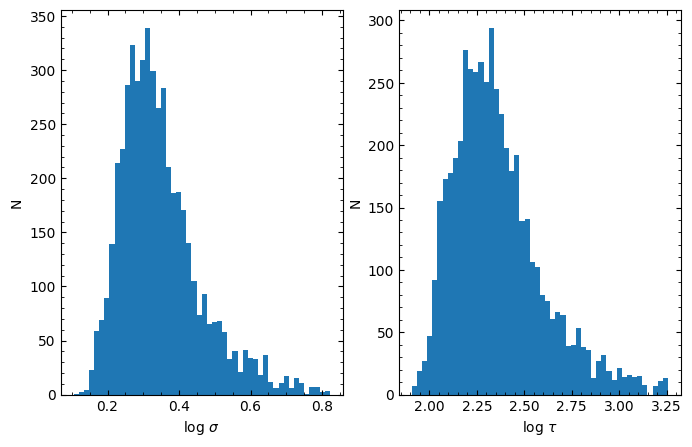

run single chain without subdividing matrix 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.766 136.79 ]
 [  2.123 209.415]
 [  2.793 375.971]]
penalize lags longer than 0.10 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line1/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.29 0.31 0.29 0.21 0.37 0.25 0.25 0.26 0.19 0.29 0.26 0.34 0.27 0.28 0.25 0.26 0.17 0.13 0.29 0.25 0.20 0.26 0.29 0.17 0.11 0.30 0.28 0.23 0.31 0.23 0.21 0.23 0.29 0.23 0.18 0.14 0.20 0.14 0.19 0.31 0.32 0.32 0.29 0.26 0.26 0.23 0.37 0.27 0.26 0.24
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line1/javelin/chain_rmap.txt
save logp of MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line1/javelin/logp_rmap.txt
HPD of sigma

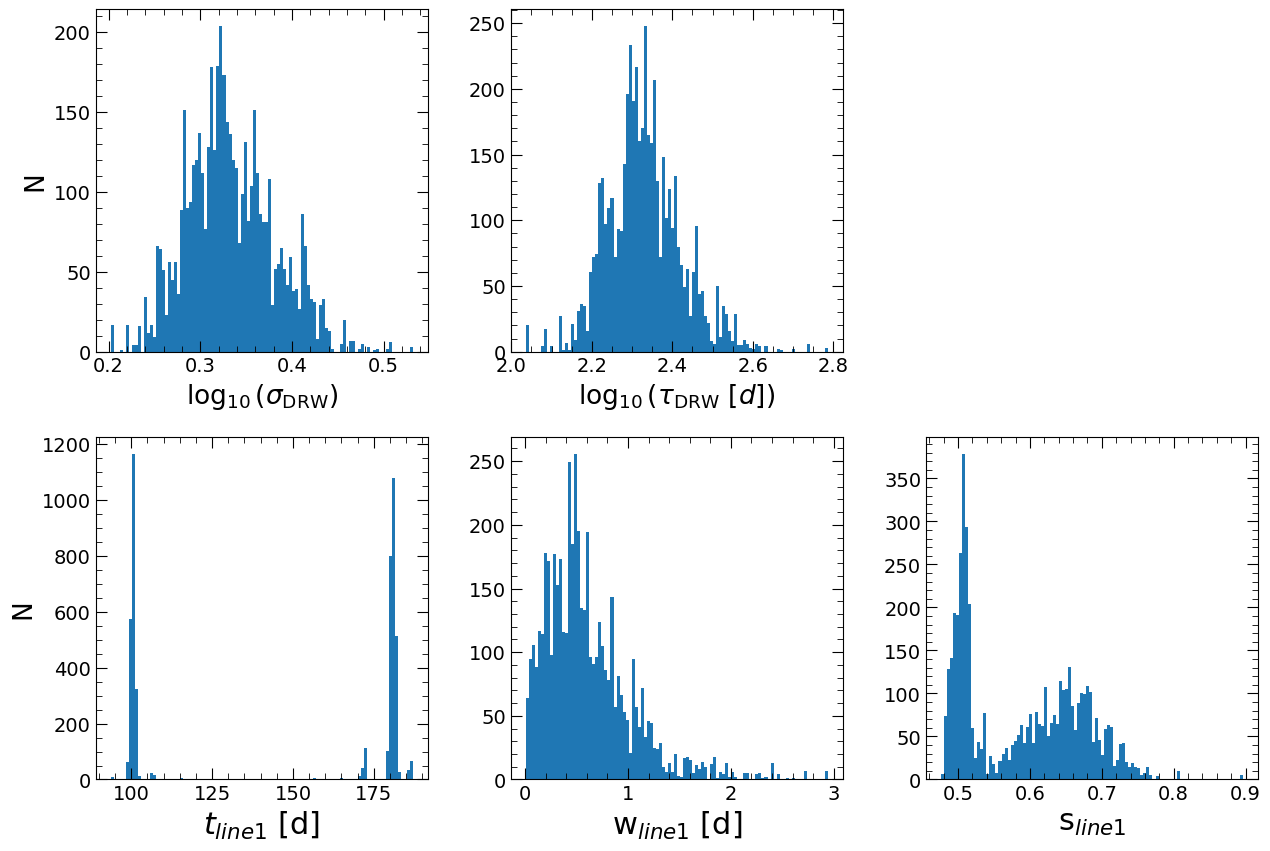

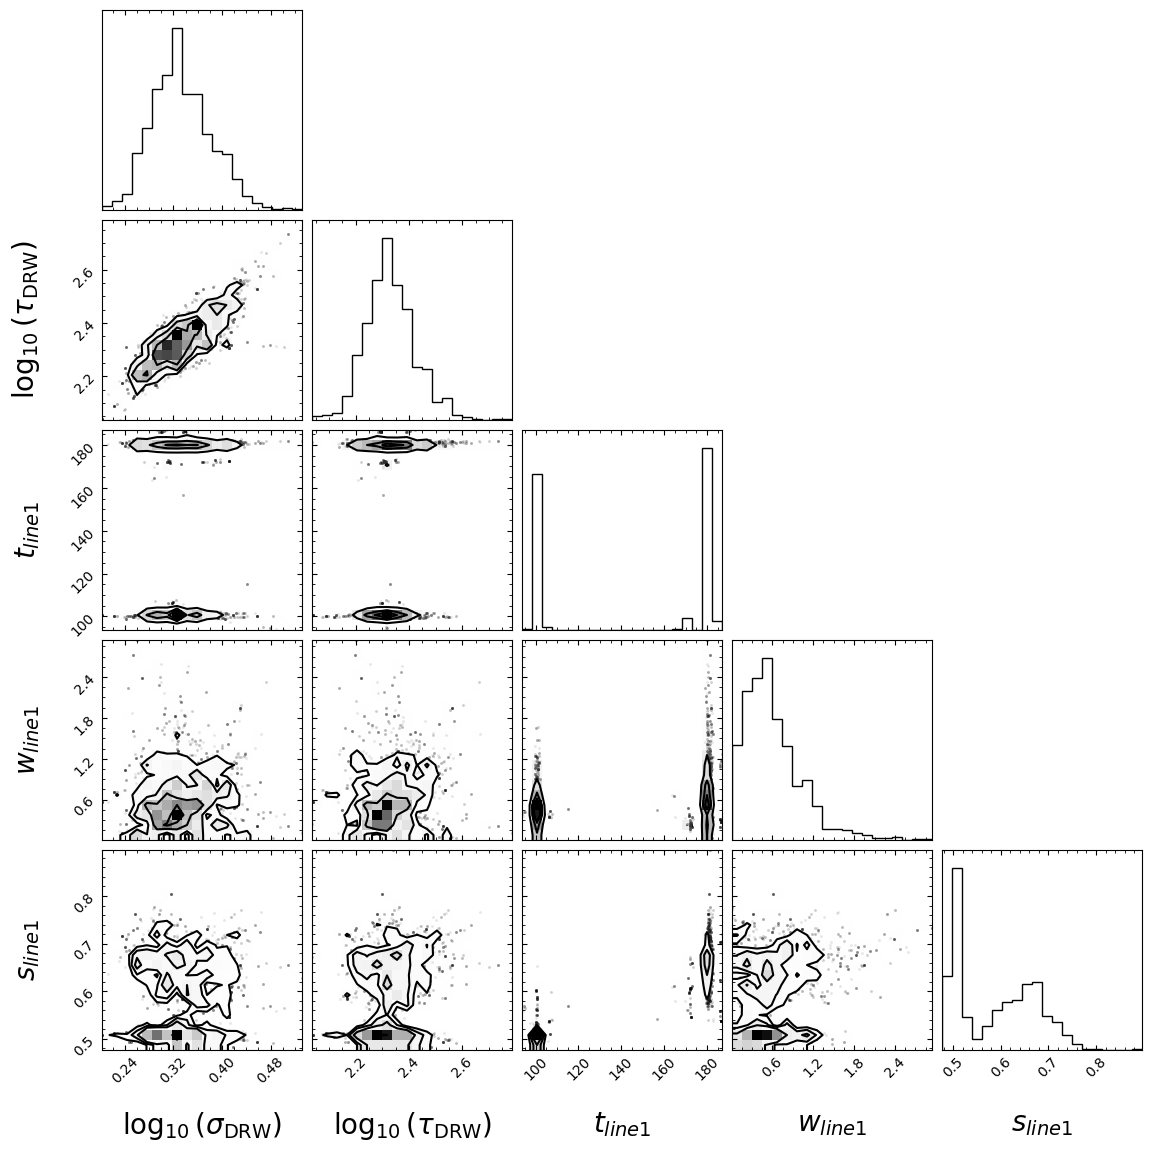

covariance matrix calculated
covariance matrix decomposed and updated by U


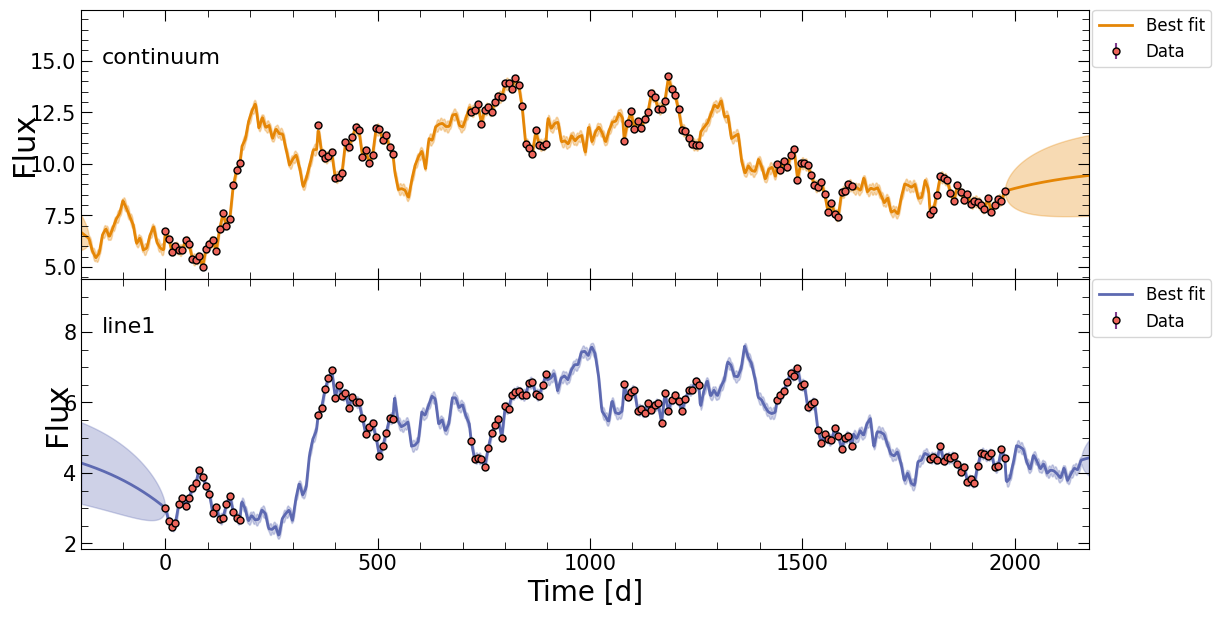

start burn-in
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/burn_cont.txt
start sampling
sampling finished
acceptance fractions for all walkers are
0.74 0.71 0.69 0.61 0.69 0.74 0.81 0.76 0.72 0.67 0.71 0.74 0.75 0.53 0.75 0.65 0.73 0.63 0.69 0.65 0.69 0.70 0.68 0.72 0.71 0.76 0.71 0.73 0.73 0.66 0.66 0.76 0.65 0.70 0.70 0.75 0.67 0.79 0.64 0.77 0.74 0.84 0.79 0.73 0.70 0.68 0.62 0.70 0.69 0.68
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/chain_cont.txt
save logp of MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/logp_cont.txt
HPD of sigma
low:    1.759 med    2.116 hig    2.766
HPD of tau
low:  139.561 med  207.984 hig  356.920


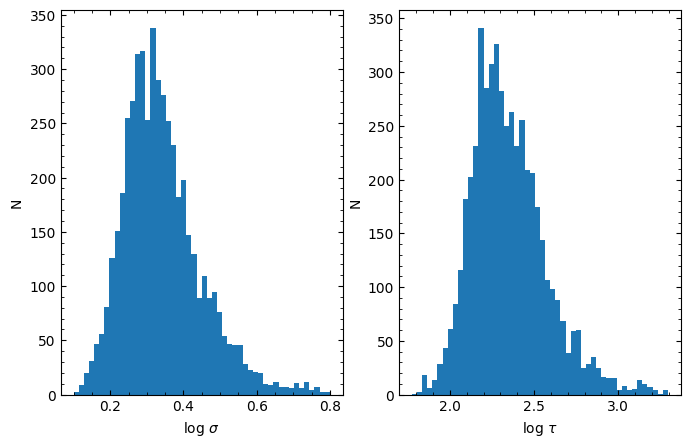

run single chain without subdividing matrix 
start burn-in
using priors on sigma and tau from continuum fitting
[[  1.759 139.561]
 [  2.116 207.984]
 [  2.766 356.92 ]]
penalize lags longer than 0.10 of the baseline
no penalizing long widths, but within the baseline
nburn: 50 nwalkers: 50 --> number of burn-in iterations: 2500
burn-in finished
save burn-in chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/burn_rmap.txt
start sampling
sampling finished
acceptance fractions are
0.21 0.25 0.22 0.13 0.17 0.23 0.17 0.17 0.17 0.23 0.22 0.02 0.19 0.09 0.31 0.24 0.03 0.10 0.31 0.08 0.22 0.15 0.15 0.22 0.11 0.26 0.04 0.02 0.23 0.08 0.19 0.15 0.16 0.21 0.01 0.07 0.24 0.08 0.14 0.23 0.16 0.20 0.17 0.21 0.02 0.10 0.26 0.13 0.27 0.01
save MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/chain_rmap.txt
save logp of MCMC chains to /home/stone28/projects/petl_mock/test_repo/javelin_output1/line2/javelin/logp_rmap.txt
HPD of sigma

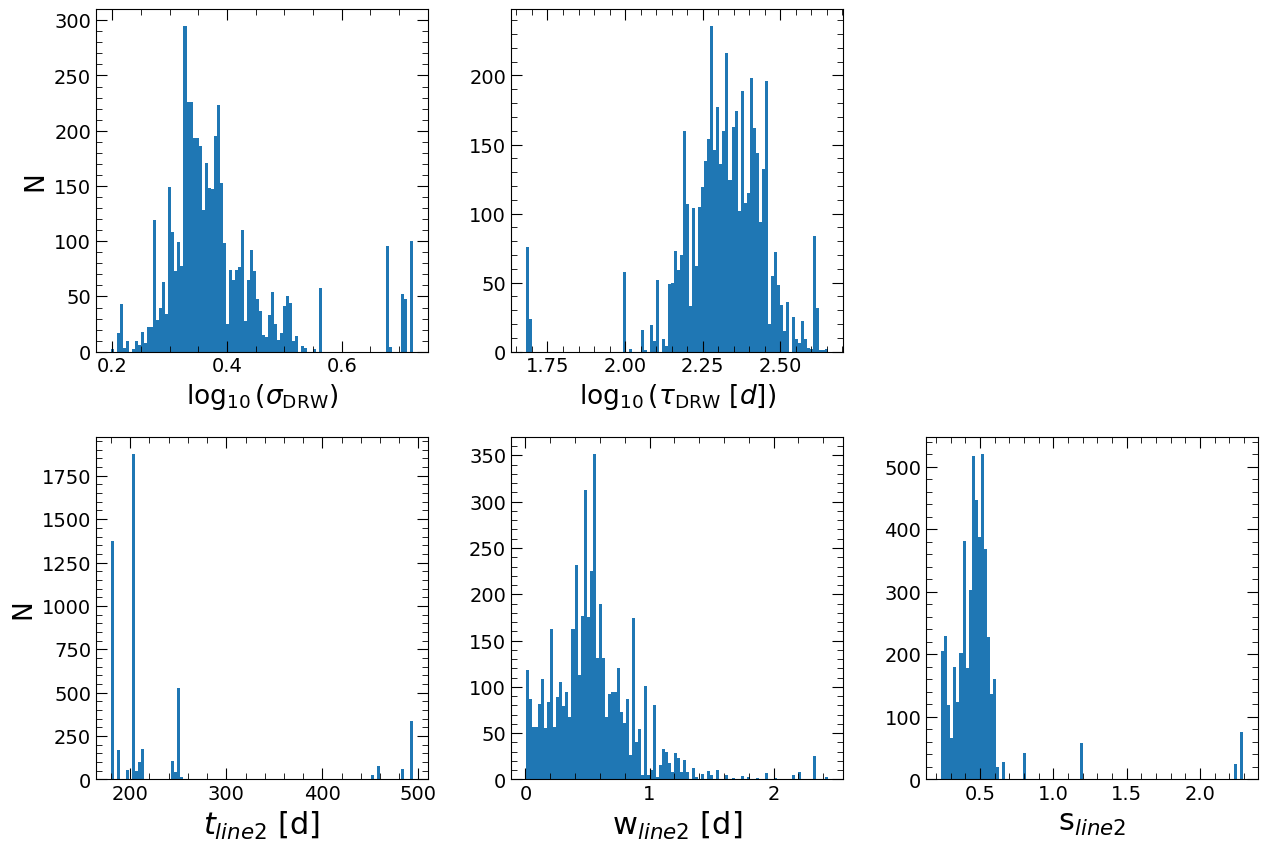

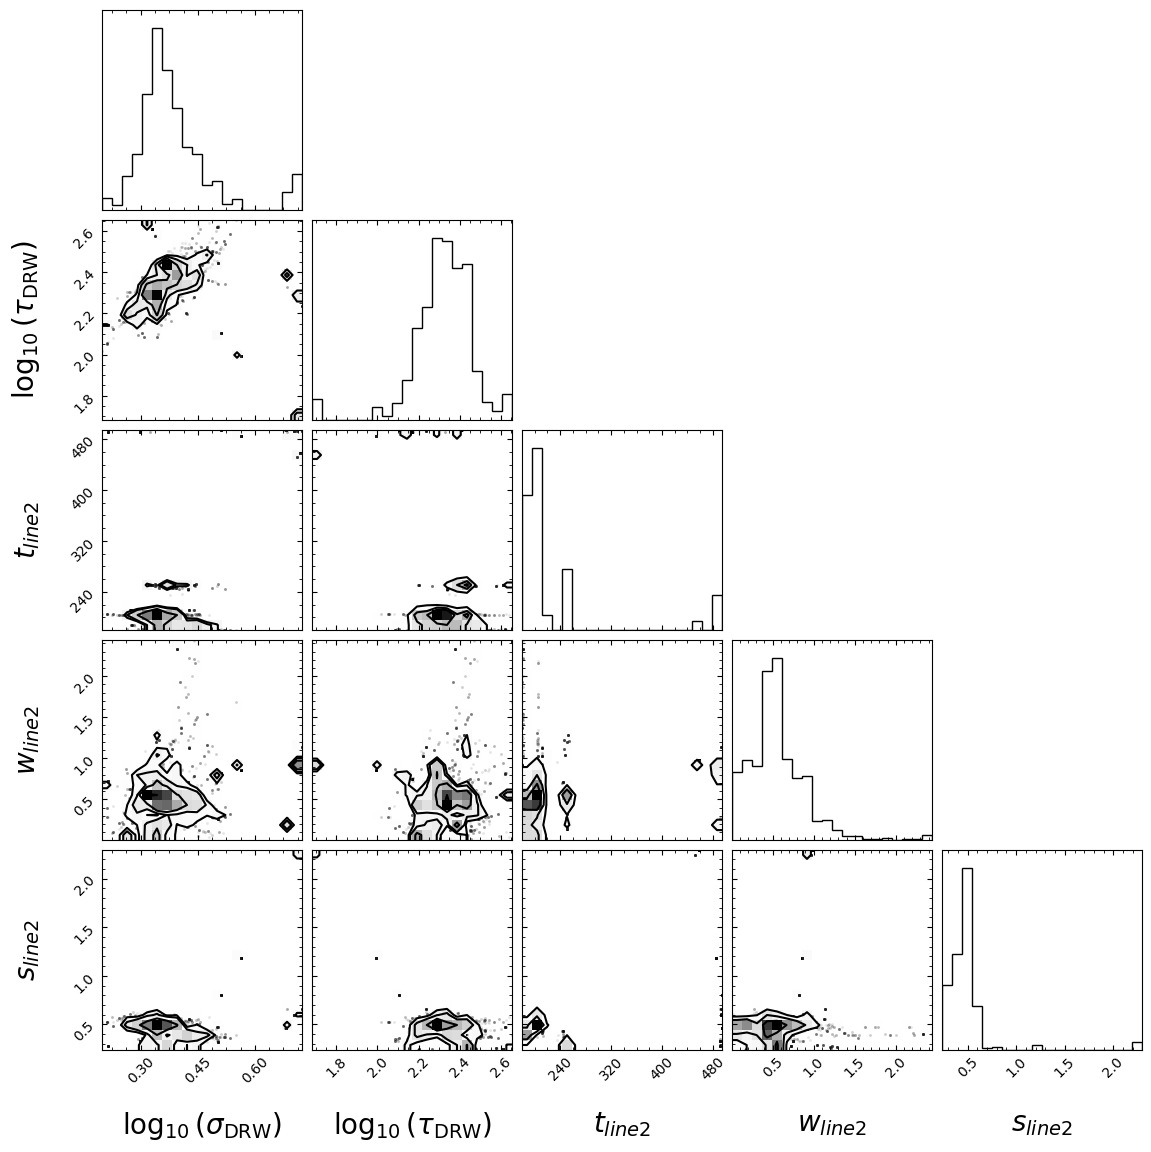

covariance matrix calculated
covariance matrix decomposed and updated by U


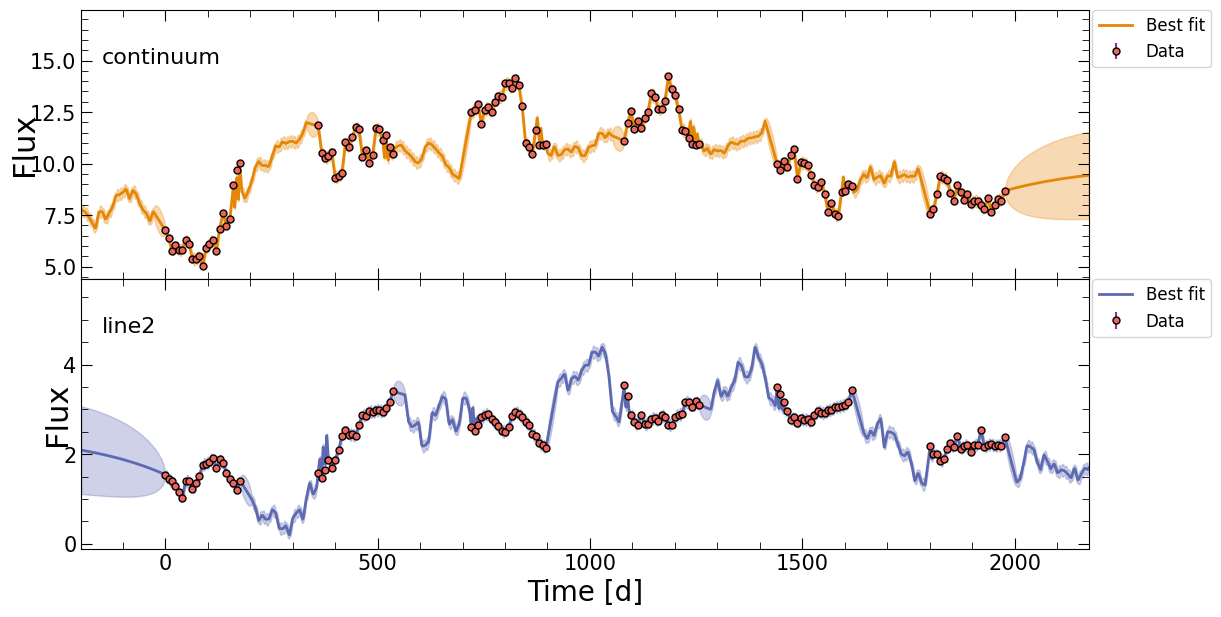

In [2]:
output_dir = 'javelin_output1/'

params = {
    'nwalker': 50,
    'nburn': 50,
    'nchain': 100,
    'lagtobaseline': 0.1,
    'nbin': 100
}

res = pl.run_pipeline( output_dir, filenames, line_names,
                 run_javelin=True,
                 javelin_params=params,
                 verbose=True,
                 plot=True,
                 file_fmt='ascii',
                 lag_bounds=[[0,200],[0,500]])

JAVELIN Output Files 
--------------------

JAVELIN's output files and figures depend on the input parameters given. If ``together=True``, the subdirectory containing all files/figures will be in ``output_dir/javelin/``. If ``together=False``, there will be a subdirectory for each line in ``output_dir/(line_name)/javelin/``.

The output subdirectory will have he following files, where ``(name)`` is the input name of the line:

* ``burn_cont.txt`` : The burn-in chains from the MCMC for the initial continuum fit 
* ``chain_cont.txt`` : The chains from the MCMC for the initial continuum fit
* ``logp_cont.txt``: The log-probability output from the MCMC for the initial continuum fit

* ``burn_rmap.txt``: The burn-in chains from the MCMC for the combined fit
* ``chain_rmap.txt``: The chains from the MCMC fit for the combined fit 
* ``logp_rmap.txt``: The log-probability output from the MCMC for the combined fit  

* ``(name)_lc_fits.dat``: The predicted light curve using the best-fit JAVELIN parameters. There will be one file for each line.

* ``javelin_bestfit.pdf``: A figure showing the fits to the light curves on top of the input data
* ``javelin_histogram.pdf``: A fgure showing the histograms for the posteriors for each of the JAVELIN parameters 

* ``cont_lcfile.dat``: A light curve file for the continuum data in JAVELIN format
* ``tot_lcfile.dat``: A light curve file for all light curves (continuum + lines) in JAVELIN format

If ``fixed`` is set to ``None`` (or all parameters are allowed to vary), a corner plot will also be produced:

* ``javelin_corner.pdf``: A corner plot for all of the JAVELIN parameters

.. note:: Outputting ``burn_x.txt``, ``chain_x.txt``, and ``logp_x.txt`` can be turned off by setting ``output_burn``, ``output_chain``, and ``output_logp`` to ``False`` in ``javelin_params``

In this case, the output directory will look like this, where the ``javelin`` directories for both lines are nearly identical:

```
quickstart_output/
├── continuum
├── line1/
│   └── javelin/
│       ├── burn_cont.txt
│       ├── burn_rmap.txt
│       ├── logp_cont.txt
│       ├── logp_rmap.txt
│       ├── chain_cont.txt
│       ├── chain_rmap.txt
│       ├── continuum_lc_fits.dat
│       ├── line1_lc_fits.dat
│       ├── cont_lcfile.dat
│       ├── tot_lcfile.dat
│       ├── javelin_histogram.pdf
│       ├── javelin_corner.pdf
│       └── javelin_bestfit.pdf
├── line2/
│   └── javelin
└── light_curves
```

JAVELIN Output Dict
-------------------

The JAVELIN module will output a ``dict`` containing a variety of data products from pyPetal's JAVELIN analysis. This ``dict`` will be stored in the total output ``dict`` under the key ``javelin_res``. If ``together=False``, this will be a list of ``dict``, one for each line.

This output ``dict`` will contain the following keys:

* ``cont_hpd``: The highest posterior density (HPD) interval for the initial continuum fit. If both DRW parameters are fixed, this will be ``None``. The first column corresponds to $\sigma_{\rm DRW}$, and the second corresponds to $\tau_{\rm DRW}$.

* ``tau``: The list of MCMC samples for $\tau_{\rm DRW}$.

* ``sigma``: The list of MCMC samples for $\sigma_{\rm DRW}$.

* ``tophat_params``: The list of MCMC samples for the tophat parameters. There will be $3\cdot(\rm number \ of \ lines)$ columns, grouped in threes for each line in the following order: (lag, width, scale).

* ``hpd``: The HPD interval for the combined fit. The first column corresponds to $\sigma_{\rm DRW}$, the second corresponds to $\tau_{\rm DRW}$, and the rest are the tophat parameters, in the same order as described in ``tophat_params``.

* ``cont_model``: The output javelin.lcmodel object for the initial continuum fit

* ``rmap_model``: The output javelin.lcmodel object for the combined fit

* ``cont_dat``: The continuum light curve in a javelin.LightCurve object
  
* ``tot_dat``: All light curves (continuum + lines) in a javelin.LightCurve object

* ``bestfit_model``: The best-fit javelin.lcmodel object for the light curves